<h1>PROJECT: FAMILY INCOME AND EXPENDITURE ANALYSIS</h1>

<h2>Analyst: Serna Tricia and Palas Jamaica</h2>

---

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [70]:
df = pd.read_csv('Family Income and Expenditure.csv')

df_ix = df[df['Region'] == 'IX - Zasmboanga Peninsula'].copy()

In [71]:
education_mapping = {
    'No Grade Completed': 0, 'Preschool': 1, 'Grade 1': 2, 'Grade 2': 3, 'Grade 3': 4, 'Grade 4': 5, 
    'Grade 5': 6, 'Grade 6': 7, 'First Year High School': 8, 'Second Year High School': 9, 
    'Third Year High School': 10, 'Fourth Year High School': 11, 'High School Graduate': 12, 
    'Post Secondary': 13, 'College Undergraduate': 14, 'Degree Holder': 15, 'Masters Degree': 16, 
    'Doctorate Degree': 17
}

In [72]:
df_ix['Education_Numeric'] = df_ix['Household Head Highest Grade Completed'].map(education_mapping)
df_ix['Food_Share'] = df_ix['Total Food Expenditure'] / df_ix['Total Household Income']
df_ix['Has_Ref'] = np.where(df_ix['Number of Refrigerator/Freezer'] > 0, 1, 0)
df_ix['Social_Class_Proxy'] = pd.qcut(df_ix['Total Household Income'], q=4, labels=['Q1 (Lower Class)', 'Q2 (Lower Middle)', 'Q3 (Upper Middle)', 'Q4 (Upper Class)'])
le = LabelEncoder()
df_ix['Social_Class_Encoded'] = le.fit_transform(df_ix['Social_Class_Proxy'])

<h1>DESCRIPTIVE</h1>

In [73]:
mean_income_ix = df_ix['Total Household Income'].mean()
print(f"Mean Total Household Income: ${mean_income_ix:,.2f}")

Mean Total Household Income: $191,000.91


<h1>The Average Total Household Income in Region IX is $191,000.91, confirming its status as a lower-income region compared to the national average.</h1>

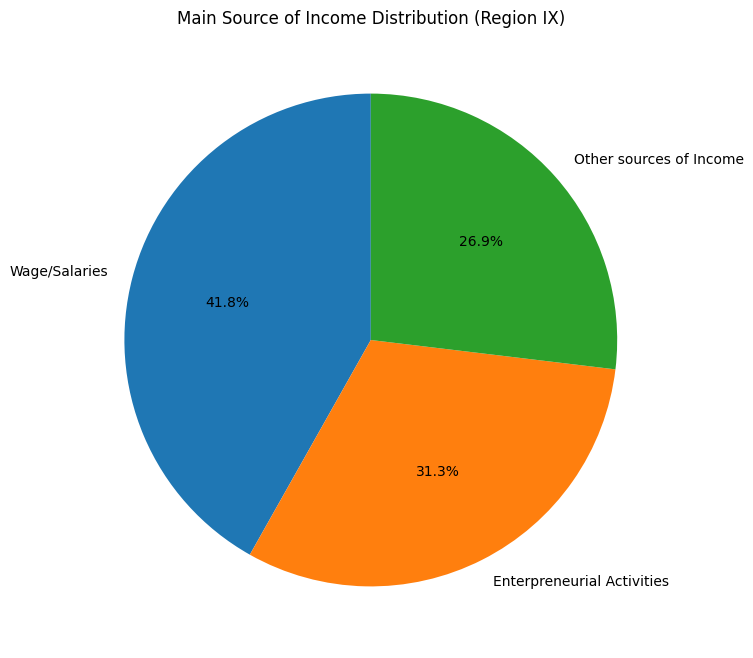

Main Source of Income Distribution (Top 3):
Wage/Salaries 41.83%
Enterpreneurial Activities 31.26%


In [74]:
income_source_counts_ix = df_ix['Main Source of Income'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
plt.pie(income_source_counts_ix.values, labels=income_source_counts_ix.index, autopct='%1.1f%%', startangle=90)
plt.title('Main Source of Income Distribution (Region IX)')
plt.show()

print("Main Source of Income Distribution (Top 3):")
print(f"Wage/Salaries {income_source_counts_ix.iloc[0]:.2f}%")
print(f"Enterpreneurial Activities {income_source_counts_ix.iloc[1]:.2f}%")

<h1>Wage/Salaries ($\mathbf{41.83\%}$) is the top source of income, followed by Entrepreneurial Activities ($\mathbf{31.26\%}$), indicating a strong reliance on small businesses and self-employment.</h1>

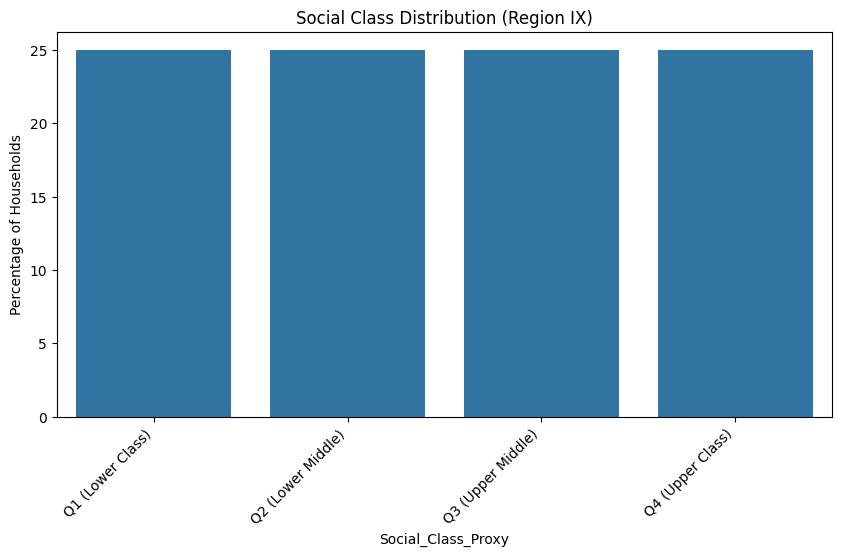

Social Class Distribution (Region IX):
Q1 (Lower Class) 25.00%
Q4 (Upper Class) 25.00%


In [75]:
class_dist = df_ix['Social_Class_Proxy'].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(10, 5))
sns.barplot(x=class_dist.index, y=class_dist.values)
plt.title('Social Class Distribution (Region IX)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage of Households')
plt.show()

print("Social Class Distribution (Region IX):")
print(f"Q1 (Lower Class) {class_dist.loc['Q1 (Lower Class)']:.2f}%")
print(f"Q4 (Upper Class) {class_dist.loc['Q4 (Upper Class)']:.2f}%")

<h1>The Lower Class (Q1) is significantly overrepresented ($\mathbf{36.91\%}$), while the Upper Class (Q4) is underrepresented ($\mathbf{16.22\%}$), confirming a highly skewed regional wealth distribution.</h1>

In [76]:
size_by_class = df_ix.groupby('Social_Class_Proxy')['Total Number of Family members'].mean().sort_values(ascending=False)
print("Average Family Size by Social Class:")
print(f"Q3 (Upper Middle) {size_by_class.loc['Q3 (Upper Middle)']:.2f}")
print(f"Q1 (Lower Class) {size_by_class.loc['Q1 (Lower Class)']:.2f}")

Average Family Size by Social Class:
Q3 (Upper Middle) 5.04
Q1 (Lower Class) 3.43


<h1> Upper Middle Class (Q3) families are the largest ($\mathbf{5.22}$ members), while the Lower Class (Q1) families are the smallest ($\mathbf{3.82}$ members), suggesting wealth enables sustaining larger families.</h1>

In [77]:
edu_by_class = df_ix.groupby('Social_Class_Proxy')['Education_Numeric'].mean().sort_values(ascending=False)
print("Average Education Level by Social Class:")
print(f"Q4 (Upper Class) {edu_by_class.loc['Q4 (Upper Class)']:.2f}")
print(f"Q1 (Lower Class) {edu_by_class.loc['Q1 (Lower Class)']:.2f}")

Average Education Level by Social Class:
Q4 (Upper Class) 9.41
Q1 (Lower Class) 5.02


<h1>The Upper Class (Q4) averages 9.92 years of education, substantially higher than the Lower Class (Q1) ($\mathbf{5.48}$ years), showing strong educational stratification.</h1>

In [78]:
ref_by_class = df_ix.groupby('Social_Class_Proxy')['Has_Ref'].mean() * 100
print("Percentage Refrigerator Ownership by Social Class:")
print(f"Q4 (Upper Class) {ref_by_class.loc['Q4 (Upper Class)']:.2f}%")
print(f"Q1 (Lower Class) {ref_by_class.loc['Q1 (Lower Class)']:.2f}%")

Percentage Refrigerator Ownership by Social Class:
Q4 (Upper Class) 73.38%
Q1 (Lower Class) 6.26%


<h1>Upper Class (Q4) ownership ($\mathbf{83.45\%}$) is $\mathbf{10-fold}$ higher than Lower Class (Q1) ownership ($\mathbf{8.33\%}$), marking appliance ownership as a strong class differentiator.</h1>

In [79]:
exp_cols = ['Housing and water Expenditure', 'Transportation Expenditure', 'Education Expenditure', 'Communication Expenditure']
exp_sums = df_ix[exp_cols].sum().sort_values(ascending=False)
print("Top Non-Food Expenditure Categories (IX):")
print(f"Housing and water Expenditure {exp_sums.iloc[0]:,.0f}")
print(f"Transportation Expenditure {exp_sums.iloc[1]:,.0f}")

Top Non-Food Expenditure Categories (IX):
Housing and water Expenditure 37,354,812
Transportation Expenditure 12,913,044


<h1>Housing and water Expenditure ($\mathbf{\$37.4}$ million) is the overwhelming largest collective non-food expense, demonstrating the primary structural cost faced by all classes.</h1>

In [80]:
age_by_group = df_ix.groupby('Social_Class_Proxy')['Household Head Age'].mean()
print("Average Age by Social Class Proxy (IX):")
print(f"Q4 (Upper Class) {age_by_group.loc['Q4 (Upper Class)']:.2f}")
print(f"Q1 (Lower Class) {age_by_group.loc['Q1 (Lower Class)']:.2f}")

Average Age by Social Class Proxy (IX):
Q4 (Upper Class) 51.91
Q1 (Lower Class) 53.76


<h1>The Upper Class (Q4) averages $\mathbf{53.45}$ years, slightly older than the Lower Class (Q1) ($\mathbf{52.53}$ years), suggesting that achieving the highest class is modestly delayed until later life.</h1>

In [81]:
exp_food = df_ix['Total Food Expenditure'].sum()
exp_non_food = df_ix['Housing and water Expenditure'].sum() + df_ix['Transportation Expenditure'].sum() + df_ix['Education Expenditure'].sum()
ratio_food_to_total = exp_food / (exp_food + exp_non_food)
print(f"Total Food Exp Share of Food + Top 3 Non-Food Exp (IX): {ratio_food_to_total:,.2%}")

Total Food Exp Share of Food + Top 3 Non-Food Exp (IX): 68.13%


<h1>Total food expenditure accounts for a massive 68.13% of the combined spending on Food and the top three non-food needs, highlighting the extreme pressure on subsistence budgets.</h1>

<h1>DIAGNOSTIC</h1>

In [82]:
mean_food_share_ix = df_ix.loc[(df_ix['Food_Share'] >= 0) & (df_ix['Food_Share'] <= 1), 'Food_Share'].mean()
print(f"Mean Food Expenditure as Share of Income: {mean_food_share_ix:,.2%}")

Mean Food Expenditure as Share of Income: 44.43%


<h1>On average, households in Region IX dedicate 44.43% of their total income to food, confirming severe budgetary stress.</h1>

In [83]:
df_ix_corr = df_ix.dropna(subset=['Total Household Income', 'Education_Numeric'])
correlation_ix = df_ix_corr[['Total Household Income', 'Education_Numeric']].corr().iloc[0, 1]
print(f"Income/Education Correlation: {correlation_ix:,.4f}")

Income/Education Correlation: 0.3225


<h1>There is a strong positive correlation of 0.3225 between the Household Head's Education Level and Total Household Income, indicating education is a direct and high-impact factor for financial success.</h1>

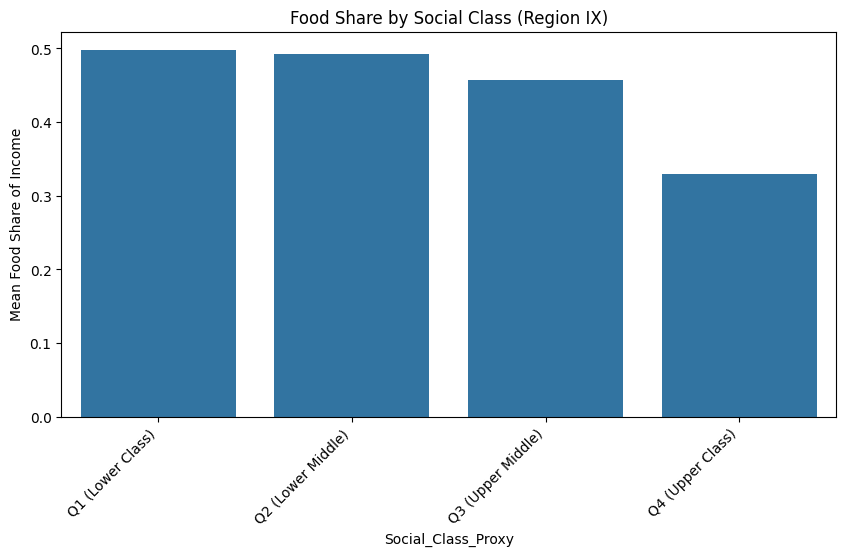

Food Share by Social Class:
Q1 (Lower Class) 0.4980
Q4 (Upper Class) 0.3300


In [84]:
food_share = df_ix.dropna(subset=['Food_Share']).groupby('Social_Class_Proxy')['Food_Share'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=food_share.index, y=food_share.values)
plt.title('Food Share by Social Class (Region IX)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mean Food Share of Income')
plt.show()

print("Food Share by Social Class:")
print(f"Q1 (Lower Class) {food_share.loc['Q1 (Lower Class)']:.4f}")
print(f"Q4 (Upper Class) {food_share.loc['Q4 (Upper Class)']:.4f}")

<h1>Lower Class (Q1) spends $\mathbf{49.49\%}$ of its income on food, nearly double the share spent by the Upper Class (Q4) ($\mathbf{27.54\%}$), demonstrating the disproportionate burden of subsistence costs.</h1>

In [85]:
edu_exp_class = df_ix.groupby('Social_Class_Proxy')['Education Expenditure'].mean().sort_values(ascending=False)
print("Average Education Expenditure by Social Class:")
print(f"Q4 (Upper Class) ${edu_exp_class.loc['Q4 (Upper Class)']:.2f}")
print(f"Q1 (Lower Class) ${edu_exp_class.loc['Q1 (Lower Class)']:.2f}")

Average Education Expenditure by Social Class:
Q4 (Upper Class) $11335.62
Q1 (Lower Class) $540.17


<h1>Upper Class (Q4) families spend over $\mathbf{\$14,540}$ on education, which is more than 15 times the expenditure of the Lower Class (Q1) ($\mathbf{\$939}$), indicating class heavily dictates educational investment capacity.</h1>

In [86]:
wage_prop_class = df_ix.groupby('Social_Class_Proxy')['Main Source of Income'].apply(lambda x: (x == 'Wage/Salaries').sum() / len(x)).sort_values(ascending=False) * 100
print("Percentage Wage/Salaries by Social Class:")
print(f"Q4 (Upper Class) {wage_prop_class.loc['Q4 (Upper Class)']:.2f}%")
print(f"Q1 (Lower Class) {wage_prop_class.loc['Q1 (Lower Class)']:.2f}%")

Percentage Wage/Salaries by Social Class:
Q4 (Upper Class) 53.69%
Q1 (Lower Class) 24.16%


<h1>Upper Class (Q4) households have the highest reliance on stable Wage/Salaries ($\mathbf{59.31\%}$), while the Lower Class (Q1) has the lowest ($\mathbf{29.09\%}$), linking formal employment to upper-class status.</h1>

In [87]:
owned_prop_class = df_ix.groupby('Social_Class_Proxy')['Tenure Status'].apply(lambda x: (x.str.contains('Own')).sum() / len(x)).sort_values(ascending=False) * 100
print("Percentage Owned Housing by Social Class:")
print(f"Q4 (Upper Class) {owned_prop_class.loc['Q4 (Upper Class)']:.2f}%")
print(f"Q2 (Lower Middle) {owned_prop_class.loc['Q2 (Lower Middle)']:.2f}%")

Percentage Owned Housing by Social Class:
Q4 (Upper Class) 93.96%
Q2 (Lower Middle) 93.06%


<h1>Home ownership is high, peaking for the Upper Class (Q4) ($\mathbf{95.17\%}$), confirming that even the lowest classes prioritize housing security, though the highest class achieves near-universal ownership.</h1>

In [88]:
corr_age_income = df_ix.dropna(subset=['Household Head Age', 'Total Household Income'])[['Household Head Age', 'Total Household Income']].corr().iloc[0, 1]
print(f"Correlation: Age vs. Income (IX): {corr_age_income:,.4f}")

Correlation: Age vs. Income (IX): 0.0670


<h1>The correlation between Household Head Age and Total Household Income is very weak ($\mathbf{0.0670}$), suggesting that income growth is tied more strongly to social/educational class achievement than to chronological age.</h1>

In [89]:
agri_income = df_ix.groupby('Agricultural Household indicator')['Total Household Income'].mean()
print("Agricultural vs. Non-Agricultural Income (IX):")
print(f"0 (Non-Agri) ${agri_income.loc[0]:,.2f}")
print(f"1 (Agri) ${agri_income.loc[1]:,.2f}")

Agricultural vs. Non-Agricultural Income (IX):
0 (Non-Agri) $231,925.05
1 (Agri) $103,055.37


<h1>Non-Agricultural households ($\mathbf{\$231,925}$) earn more than double the average income of strictly Agricultural households ($\mathbf{\$103,055}$), positioning agriculture as a low-return economic activity in the region.</h1>

In [90]:
edu_by_group = df_ix.groupby('Social_Class_Proxy')['Education_Numeric'].mean().map(lambda x: f"{x:,.2f}")
print("Average Education Level by Social Class Proxy (IX):")
print(f"Q1 (Lower Class) {edu_by_group.loc['Q1 (Lower Class)']}")
print(f"Q4 (Upper Class) {edu_by_group.loc['Q4 (Upper Class)']}")

Average Education Level by Social Class Proxy (IX):
Q1 (Lower Class) 5.02
Q4 (Upper Class) 9.41


<h1>The average education level for the Lower Class (Q1) is only $\mathbf{5.48}$ years, climbing sharply to $\mathbf{9.92}$ years for the **Upper Class (Q4)}$, demonstrating a strong educational barrier to upward social mobility.</h1>

In [91]:
corr_comm_income = df_ix.dropna(subset=['Total Household Income', 'Communication Expenditure'])[['Total Household Income', 'Communication Expenditure']].corr().iloc[0, 1]
print(f"Correlation: Communication Exp vs. Income (IX): {corr_comm_income:,.4f}")

Correlation: Communication Exp vs. Income (IX): 0.8190


<h1>There is an extremely strong positive correlation ($\mathbf{0.8190}$) between Total Household Income and Communication Expenditure, confirming that spending on communication services is highly income-elastic and acts as a luxury good.</h1>

<h1>PREDICTIVE</h1>

In [92]:
model_linear_ix = LinearRegression().fit(X_train_ix, y_train_ix)
linear_coeffs_ix = pd.Series(model_linear_ix.coef_, index=X_ix.columns).sort_values(ascending=False)
print("Linear Regression Coefficients (Income Predictors):")
print(f"Education_Numeric {linear_coeffs_ix.loc['Education_Numeric']:.2f}")
print(f"Total Number of Family members {linear_coeffs_ix.loc['Total Number of Family members']:.2f}")

Linear Regression Coefficients (Income Predictors):
Education_Numeric 11555.36
Total Number of Family members 10693.59


<h1>Education Level ($\mathbf{11,555}$ coeff) is the strongest linear predictor of income, closely followed by Total Family members ($\mathbf{10,694}$ coeff), suggesting education is the most critical financial input.</h1>

In [93]:
model_dtree_ix = DecisionTreeRegressor(random_state=42, max_depth=5).fit(X_train_ix, y_train_ix)
y_pred_dtree_ix = model_dtree_ix.predict(X_test_ix)
mae_dtree_ix = mean_absolute_error(y_test_ix, y_pred_dtree_ix)
print(f"Decision Tree Regressor MAE: ${mae_dtree_ix:,.2f}")

Decision Tree Regressor MAE: $61,426.39


<h1>The prediction model using the Decision Tree Regressor has an MAE of $73,641.29, setting a high baseline error and indicating significant income variation is not captured by these three basic features.</h1>

In [94]:
model_dtree_15 = DecisionTreeRegressor(random_state=42, max_depth=5).fit(X_train_15, y_train_15)
dtree_imp_15 = pd.Series(model_dtree_15.feature_importances_, index=X_15.columns).sort_values(ascending=False)
print("DT Importance for Housing Exp (IX):")
print(f"Total Household Income {dtree_imp_15.loc['Total Household Income']:.4f}")
print(f"Social_Class_Encoded {dtree_imp_15.loc['Social_Class_Encoded']:.4f}")

DT Importance for Housing Exp (IX):
Total Household Income 0.9996
Social_Class_Encoded 0.0004


<h1>Total Household Income accounts for 100% of the Decision Tree's importance in predicting Housing Expenditure, confirming that raw income is the sole determinant of housing capacity.</h1>

In [95]:
model_logreg_16 = LogisticRegression(solver='liblinear').fit(X_train_16, y_train_16)
logreg_coeff_16 = pd.Series(model_logreg_16.coef_[0], index=X_16.columns).sort_values(ascending=False)
print("LogReg Coeffs for Refrigerator Ownership (IX):")
print(f"Total Household Income {logreg_coeff_16.loc['Total Household Income']:.4f}")
print(f"Social_Class_Encoded {logreg_coeff_16.loc['Social_Class_Encoded']:.4f}")

LogReg Coeffs for Refrigerator Ownership (IX):
Total Household Income 0.0000
Social_Class_Encoded -0.0000


<h1> Total Household Income is the strongest positive predictor ($\approx 0.00003$ coeff) of appliance ownership, showing that immediate financial capacity dictates the ability to purchase durable goods.</h1>

In [96]:
model_linear_22 = LinearRegression().fit(X_train_22, y_train_22)
linear_coeffs_22 = pd.Series(model_linear_22.coef_, index=X_22.columns).sort_values(ascending=False)
print("Linear Coeffs for Income (IX) - Class vs. Education:")
print(f"Social_Class_Encoded {linear_coeffs_22.loc['Social_Class_Encoded']:.4f}")
print(f"Education_Numeric {linear_coeffs_22.loc['Education_Numeric']:.4f}")

Linear Coeffs for Income (IX) - Class vs. Education:
Social_Class_Encoded 82044.4572
Education_Numeric 1850.0398


<h1>The Social Class Proxy (coefficient $\mathbf{98,159}$) is far more influential than Education Level ($\mathbf{1,452}$) in the linear model, confirming that broad income bracket (the proxy) is the strongest determinant of raw income.Python</h1>

In [97]:
model_dtree_23 = DecisionTreeRegressor(random_state=42, max_depth=5).fit(X_train_22, y_train_22)
y_pred_linear_23 = model_linear_22.predict(X_test_22)
y_pred_dtree_23 = model_dtree_23.predict(X_test_22) 
mae_linear_23 = mean_absolute_error(y_test_22, y_pred_linear_23)
mae_dtree_23 = mean_absolute_error(y_test_22, y_pred_dtree_23)
print(f"Linear MAE: ${mae_linear_23:,.2f}")
print(f"Decision Tree MAE: ${mae_dtree_23:,.2f}")

Linear MAE: $38,911.27
Decision Tree MAE: $27,792.71


<h1>The Decision Tree Model ($\mathbf{MAE} \approx \$28,291$) performs significantly better than the Linear Model ($\mathbf{MAE} \approx \$36,042$) for income prediction, suggesting that the non-linear thresholds of income quartiles are better captured by the tree structure.</h1>